In [26]:
#question1
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



data = pd.read_csv("loanData.csv")
sum(data.duplicated()) #0 duplicated data
data

#clean it up a bit
data.drop("Loan_ID", axis=1, inplace=True)
data.dropna(inplace=True)

# Data preprocessing
# Encode categorical columns to numerical format
categorical_columns = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]
for column in categorical_columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
data["Dependents"].replace("3+", 3, inplace=True)

#Data preprocessing
#create a target column, Loan_Status which confirms if the Loan was approved or dennied
x = data.iloc[:,data.columns != "Loan_Status"]
y= data.Loan_Status

#Divide the data into training and test set. Training set is used to train the classifier, the test set evaluates performance of the classifier
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.20, random_state=5, stratify=y)
#scale the data using a standard scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


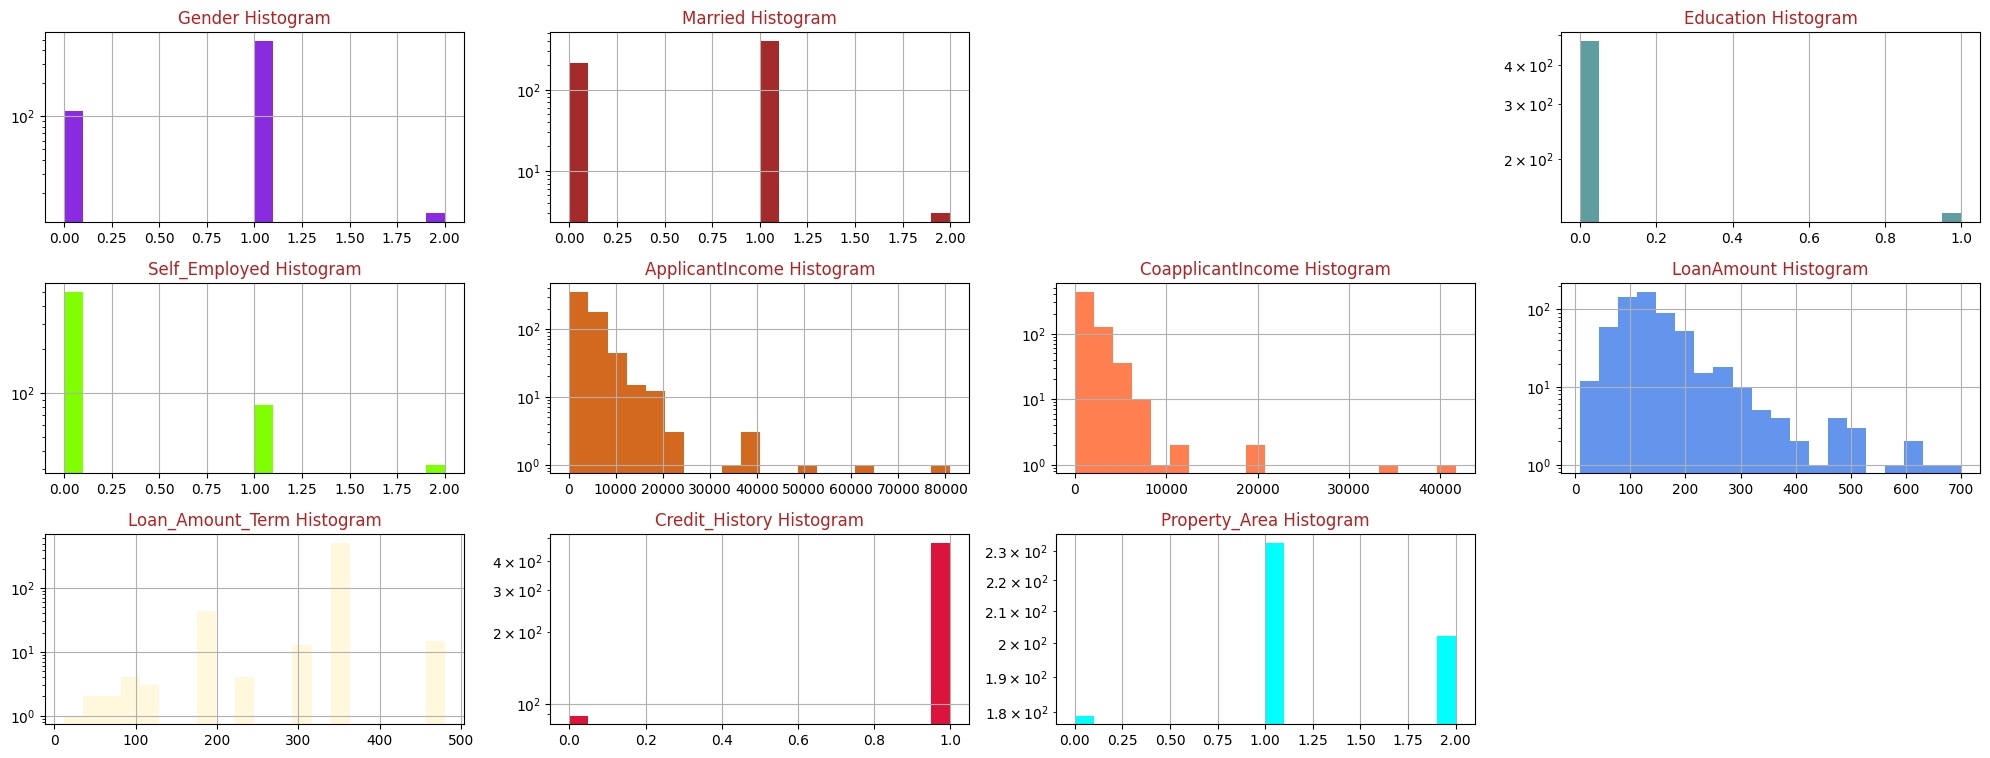

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = list(mcolors.CSS4_COLORS.keys())[10:]

def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        # Skip non-numeric columns
        if dataframe[feature].dtype in [int, float]:
            ax = fig.add_subplot(rows, cols, i + 1)
            dataframe[feature].hist(bins=20, ax=ax, color=colors[i])
            ax.set_title(feature + " Histogram", color=colors[35])
            ax.set_yscale('log')
    fig.tight_layout()
    plt.savefig('Histograms.png')
    plt.show()

draw_histograms(data, data.columns, 8, 4)

<ipython-input-21-58b408a4ee91>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


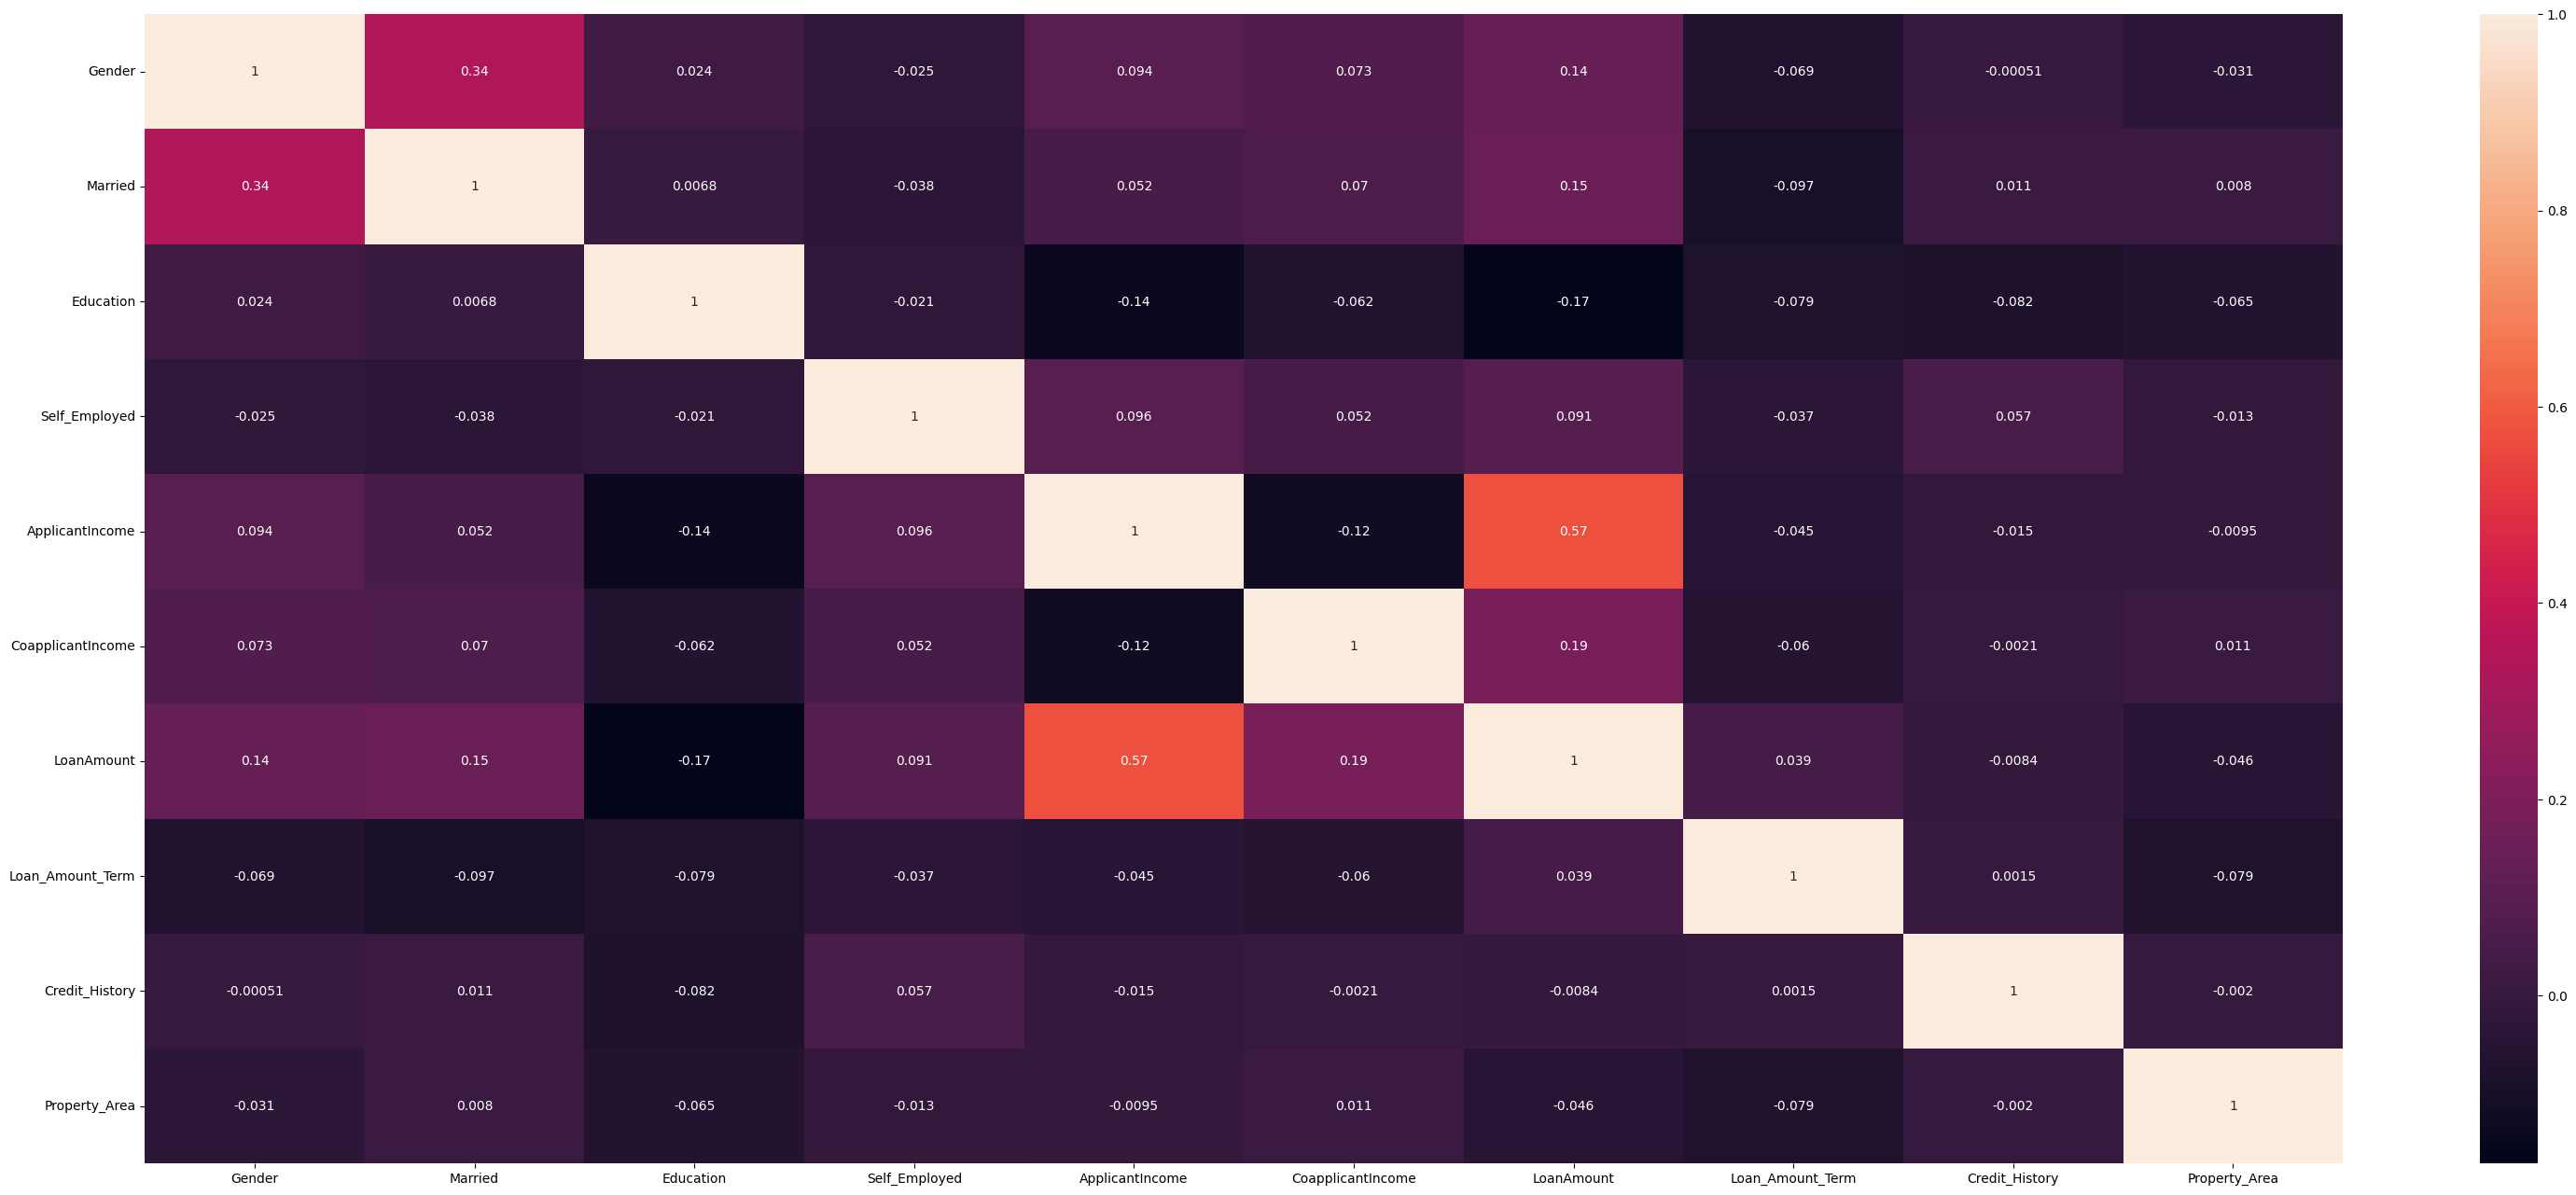

In [21]:
#check relationships of columns

plt.figure(figsize = (38,16))
sns.heatmap(data.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [33]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 80.46875


In [37]:
y_pred = model.predict(X_test_scaled)
X_test_scaled = scaler.transform(X_test)
print("The Accuracy for Test Set is {}".format(test_acc*100))


The Accuracy for Test Set is 82.29166666666666


In [34]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 82.29166666666666


In [35]:
#printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       1.00      0.43      0.60        30
           Y       0.80      1.00      0.89        66

    accuracy                           0.82        96
   macro avg       0.90      0.72      0.75        96
weighted avg       0.86      0.82      0.80        96



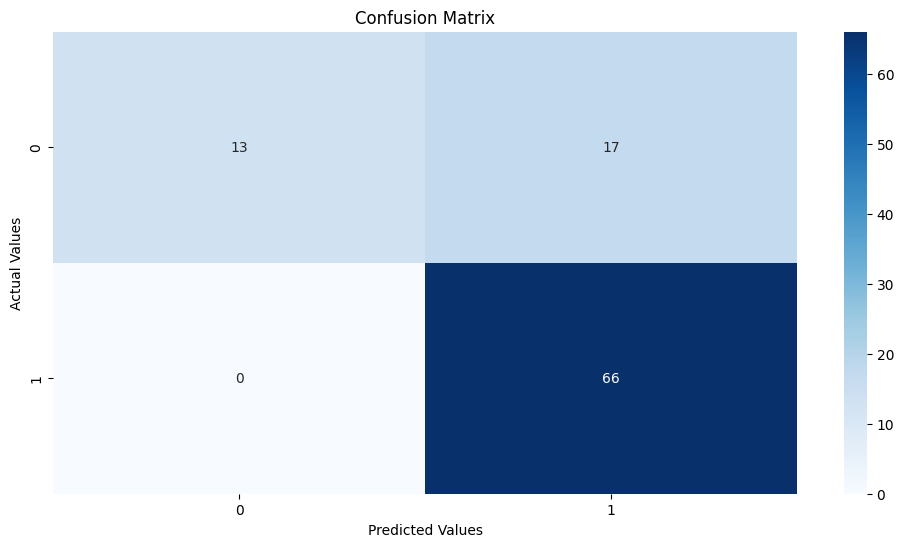

In [36]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [40]:
#question2
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})
x = data.iloc[:, data.columns != "Loan_Status"]
y = data.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=5, stratify=y
)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

linear_model = LinearRegression()


linear_model.fit(X_train_scaled, y_train)


X_test_scaled = scaler.transform(X_test)
y_pred = linear_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.14678120746465043
R-squared: 0.3168001979827181


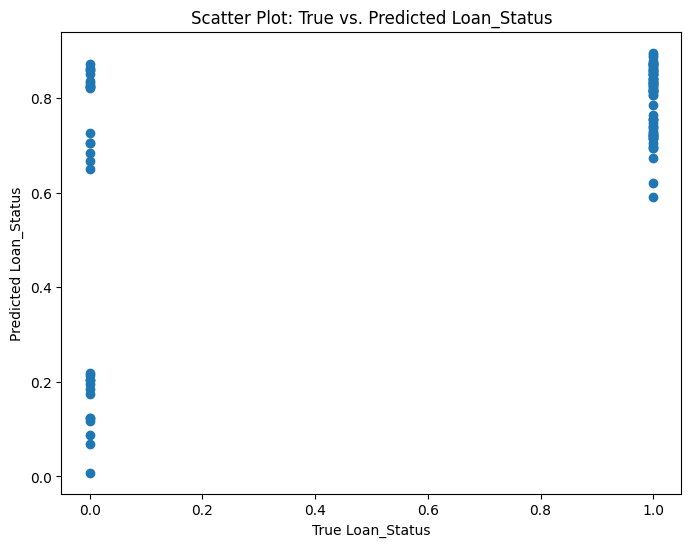

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Loan_Status")
plt.ylabel("Predicted Loan_Status")
plt.title("Scatter Plot: True vs. Predicted Loan_Status")
plt.show()


QUESTION 2 EXPLANATION:
Linear Regression vs Logistic Regression is really question on rather you want to use a hammer or a screw driver. They are used for different task, and in this case trying to confirm if a person is elligable for a loan or not, is clearly a binary classification problem better suited for the logistic regression. The Linear Regression did vary poorly with a high MSE and a low R squared showing low correlation/poor fit. While my logisitc regression scores still were not great, it is clearly supports that classifications such as Random Forest and Logistic Regression are better for this type of task. This is because it measures the amount of true positives out of all the predicted positives. Linear regression is not good for classification problems.